In [1]:
import aiohttp
import aiodns
from bs4 import BeautifulSoup
import cchardet
from elasticsearch import Elasticsearch
import socks
import pandas
import aiohttp_socks
import schedule
import geopy
from googletrans import Translator
from fake_useragent import UserAgent

In [2]:
import pandas as pd
import numpy as np

In [4]:

#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
pd.set_option('display.max_columns', 50)

In [ ]:
import twint

c = twint.Config()
c.Search = "spyware pc"
c.Min_likes = 5
c.Limit = "10000"
c.Store_csv = True
c.Output = "spyware.csv"
c.Lang = "en"
c.Pandas = True
c.Format = "Twitter Id: {id} | Username: {username} | Tweet: {tweet} |  Date: {date} | Likes: {likes}"

In [ ]:
twint.run.Search(c)

## Ransomware Data

In [6]:
ransomware_df = pd.read_csv('ransomWare.csv')

In [7]:
ransomware_df.shape

(38720, 34)

In [8]:
ransomware_df.head(30)

id      conversation_id     created_at        date  \
0   1278224549587431424  1278224549587431424  1593587455000  2020-07-01   
1   1278211673900355584  1278211673900355584  1593584385000  2020-07-01   
2   1278195380858105857  1278195380858105857  1593580501000  2020-07-01   
3   1278193031615672322  1278193031615672322  1593579941000  2020-07-01   
4   1278192706129362945  1278192706129362945  1593579863000  2020-07-01   
5   1278185322489274370  1278185322489274370  1593578103000  2020-07-01   
6   1278176597300953089  1278176597300953089  1593576022000  2020-07-01   
7   1278168968377831430  1278168968377831430  1593574203000  2020-07-01   
8   1278159054498672641  1278159054498672641  1593571840000  2020-07-01   
9   1278148090655113223  1278148090655113223  1593569226000  2020-07-01   
10  1278148056400179200  1278148056400179200  1593569218000  2020-07-01   
11  1278146486090465280  1278146486090465280  1593568843000  2020-07-01   
12  1278143540464422912  1278143540464422912  1593568141000  2020-07-01   
13  1278142106163310592  1278142106163310592  1593567799000  2020-07-01   
14  1278141746992513025  1278141746992513025  1593567713000  2020-07-01   
15  1278132784394092546  1278132771089678336  1593565577000  2020-07-01   
16  1278132771089678336  1278132771089678336  1593565573000  2020-07-01   
17  1278109448670777345  1278109448670777345  1593560013000  2020-07-01   
18  1278106183979511808  1278106183979511808  1593559234000  2020-07-01   
19  1278101172084187139  1278101172084187139  1593558040000  2020-07-01   
20  1278086825173811200  1278023289609293827  1593554619000  2020-07-01   
21  1278078614643277828  1278078614643277828  1593552661000  2020-07-01   
22  1278059193069645824  1278059193069645824  1593548031000  2020-07-01   
23  1278057667081232384  1278057667081232384  1593547667000  2020-07-01   
24  1278050360037261312  1278050360037261312  1593545925000  2020-07-01   
25  1278042625883418630  1278042625883418630  1593544081000  2020-07-01   
26  1278041162608250881  1278041162608250881  1593543732000  2020-07-01   
27  1278041076717273089  1278041076717273089  1593543712000  2020-07-01   
28  1278037863259570178  1278023289609293827  1593542946000  2020-07-01   
29  1278037694455713798  1278037694455713798  1593542905000  2020-07-01   

        time                    timezone              user_id  \
0   15:10:55  W. Australia Standard Time  1265984128538771457   
1   14:19:45  W. Australia Standard Time            128484298   
2   13:15:01  W. Australia Standard Time              3819701   
3   13:05:41  W. Australia Standard Time             17484680   
4   13:04:23  W. Australia Standard Time             91608548   
5   12:35:03  W. Australia Standard Time            128484298   
6   12:00:22  W. Australia Standard Time             20542450   
7   11:30:03  W. Australia Standard Time            109499027   
8   10:50:40  W. Australia Standard Time            326229600   
9   10:07:06  W. Australia Standard Time           2436389418   
10  10:06:58  W. Australia Standard Time           1953522745   
11  10:00:43  W. Australia Standard Time   963767159536209921   
12  09:49:01  W. Australia Standard Time             14093707   
13  09:43:19  W. Australia Standard Time             15944436   
14  09:41:53  W. Australia Standard Time            124457892   
15  09:06:17  W. Australia Standard Time             50026664   
16  09:06:13  W. Australia Standard Time             50026664   
17  07:33:33  W. Australia Standard Time             31586980   
18  07:20:34  W. Australia Standard Time   999002076842782721   
19  07:00:40  W. Australia Standard Time             14335498   
20  06:03:39  W. Australia Standard Time             39176606   
21  05:31:01  W. Australia Standard Time             11791512   
22  04:13:51  W. Australia Standard Time           1333467482   
23  04:07:47  W. Australia Standard Time   759419165832802305   
24  03:38:45  W. Australia Standard Time             35102393   
25  0

In [9]:
ransomware_df_1 = ransomware_df.drop(columns = ['place', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'timezone', 'conversation_id', 'near', 'geo', 'quote_url', 'cashtags', 'name', 'video', 'source'])

In [10]:
ransomware_df_1.head(30)

id     created_at        date      time  \
0   1278224549587431424  1593587455000  2020-07-01  15:10:55   
1   1278211673900355584  1593584385000  2020-07-01  14:19:45   
2   1278195380858105857  1593580501000  2020-07-01  13:15:01   
3   1278193031615672322  1593579941000  2020-07-01  13:05:41   
4   1278192706129362945  1593579863000  2020-07-01  13:04:23   
5   1278185322489274370  1593578103000  2020-07-01  12:35:03   
6   1278176597300953089  1593576022000  2020-07-01  12:00:22   
7   1278168968377831430  1593574203000  2020-07-01  11:30:03   
8   1278159054498672641  1593571840000  2020-07-01  10:50:40   
9   1278148090655113223  1593569226000  2020-07-01  10:07:06   
10  1278148056400179200  1593569218000  2020-07-01  10:06:58   
11  1278146486090465280  1593568843000  2020-07-01  10:00:43   
12  1278143540464422912  1593568141000  2020-07-01  09:49:01   
13  1278142106163310592  1593567799000  2020-07-01  09:43:19   
14  1278141746992513025  1593567713000  2020-07-01  09:41:53   
15  1278132784394092546  1593565577000  2020-07-01  09:06:17   
16  1278132771089678336  1593565573000  2020-07-01  09:06:13   
17  1278109448670777345  1593560013000  2020-07-01  07:33:33   
18  1278106183979511808  1593559234000  2020-07-01  07:20:34   
19  1278101172084187139  1593558040000  2020-07-01  07:00:40   
20  1278086825173811200  1593554619000  2020-07-01  06:03:39   
21  1278078614643277828  1593552661000  2020-07-01  05:31:01   
22  1278059193069645824  1593548031000  2020-07-01  04:13:51   
23  1278057667081232384  1593547667000  2020-07-01  04:07:47   
24  1278050360037261312  1593545925000  2020-07-01  03:38:45   
25  1278042625883418630  1593544081000  2020-07-01  03:08:01   
26  1278041162608250881  1593543732000  2020-07-01  03:02:12   
27  1278041076717273089  1593543712000  2020-07-01  03:01:52   
28  1278037863259570178  1593542946000  2020-07-01  02:49:06   
29  1278037694455713798  1593542905000  2020-07-01  02:48:25   

                user_id         username  \
0   1265984128538771457        shecurity   
1             128484298           dinosn   
2               3819701            zdnet   
3              17484680         nixcraft   
4              91608548          bamitav   
5             128484298           dinosn   
6              20542450     appleinsider   
7             109499027         systools   
8             326229600  fabriziobustama   
9            2436389418  swiftonsecurity   
10           1953522745        radiojibi   
11   963767159536209921       theblock__   
12             14093707            sfist   
13             15944436          9to5mac   
14            124457892      thomasareed   
15             50026664  bleepincomputer   
16             50026664  bleepincomputer   
17             31586980   shortformernie   
18   999002076842782721  gainsassociates   
19             14335498  newsycombinator   
20             39176606       campuscodi   
21             11791512          gcluley   
22           1333467482         coindesk   
23   759419165832802305         amigo_a_   
24             35102393         rpargman   
25            277568858    idownloadblog   
26           2847021941  malwrhunterteam   
27            451486149           q3w3e3   
28             22790881       briankrebs   
29           2786220516   bleedsixcolors   

                                                tweet  \
0   One of the best I’ve seen in a long time \n\n#...   
1   New Mac ransomware spreading through piracy  h...   
2   New EvilQuest ransomware discovered targeting ...   
3   New Mac ransomware spreading through piracy\n ...   
4   Recent cyber attack spree in #Australia traced...   
5   EvilQuest wiper uses ransomware cover to steal...   
6   New 'EvilQuest' ransomware is actively targeti...   
7   New ‘EvilQuest’ Mac ransomware found in pirate...   
8   EvilQuest wiper uses ransomware cover to steal...   
9   It would be obnoxious to write a ransomware fi...   
10  EvilQuest wiper uses ransomware cover to

In [11]:
ransomware_df_1.duplicated().sum()

0

In [12]:
ransomware_df_1[ransomware_df_1['id']==1194499320353046533]

id     created_at        date      time    user_id  \
8794  1194499320353046533  1573625805000  2019-11-13  14:16:45  389723579   

          username                                              tweet  \
8794  erickussalas  #PEMEX #ransomware attack. Update: Mexico's Pe...   

     mentions                                               urls photos  \
8794       []  ['https://www.bleepingcomputer.com/news/securi...     []   

      replies_count  retweets_count  likes_count                   hashtags  \
8794              6              50           55  ['#pemex', '#ransomware']   

                                                   link  retweet  
8794  https://twitter.com/erickussalas/status/119449...    False

In [13]:
ransomware_df_1.shape

(38720, 16)

In [14]:
ransom_sentences = ransomware_df_1['tweet']

In [ ]:
# --- examples -------

analyzer = SentimentIntensityAnalyzer()
for sentence in ransom_sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

In [ ]:
sid = SentimentIntensityAnalyzer()
for sentence in ransom_sentences:
     print(sentence)
     ss = sid.polarity_scores(sentence)
     for k in sorted(ss):
         print('{0}: {1}, '.format(k, ss[k]), end='')
     print()

## Virus Data

In [15]:
virus_df = pd.read_csv('virus.csv')

In [16]:
virus_df.shape

(10000, 34)

In [17]:
virus_df.head(30)

id      conversation_id     created_at        date  \
0   1278982078479171584  1278982078479171584  1593768064000  2020-07-03   
1   1278982047231508482  1278982047231508482  1593768057000  2020-07-03   
2   1278981808818921475  1278981808818921475  1593768000000  2020-07-03   
3   1278980775132749825  1278980775132749825  1593767753000  2020-07-03   
4   1278980641263157248  1278980641263157248  1593767721000  2020-07-03   
5   1278980550791966723  1278980550791966723  1593767700000  2020-07-03   
6   1278980175980617733  1278980175980617733  1593767610000  2020-07-03   
7   1278979507261632513  1278979507261632513  1593767451000  2020-07-03   
8   1278979505198174210  1278979505198174210  1593767450000  2020-07-03   
9   1278979448730275840  1278979448730275840  1593767437000  2020-07-03   
10  1278979212024651777  1278979212024651777  1593767381000  2020-07-03   
11  1278979205682925568  1278979205682925568  1593767379000  2020-07-03   
12  1278978966095720449  1278978966095720449  1593767322000  2020-07-03   
13  1278978719923736576  1278978719923736576  1593767263000  2020-07-03   
14  1278978630476083201  1278978630476083201  1593767242000  2020-07-03   
15  1278978497231245312  1278978497231245312  1593767210000  2020-07-03   
16  1278978482807152641  1278976455834324992  1593767207000  2020-07-03   
17  1278978274216095744  1278978274216095744  1593767157000  2020-07-03   
18  1278977948368986112  1278977948368986112  1593767079000  2020-07-03   
19  1278977500136292359  1278977500136292359  1593766972000  2020-07-03   
20  1278977479240224768  1278977479240224768  1593766967000  2020-07-03   
21  1278977224348180482  1278977224348180482  1593766907000  2020-07-03   
22  1278977196573495296  1278977196573495296  1593766900000  2020-07-03   
23  1278977133747089410  1278977133747089410  1593766885000  2020-07-03   
24  1278977036107866113  1278977036107866113  1593766862000  2020-07-03   
25  1278976965039452160  1278976965039452160  1593766845000  2020-07-03   
26  1278976943497543681  1278974725436379136  1593766840000  2020-07-03   
27  1278976900942245888  1278976900942245888  1593766830000  2020-07-03   
28  1278976793291231233  1278976793291231233  1593766804000  2020-07-03   
29  1278976777239609344  1278976777239609344  1593766800000  2020-07-03   

        time                    timezone              user_id  \
0   17:21:04  W. Australia Standard Time            705803209   
1   17:20:57  W. Australia Standard Time             18532574   
2   17:20:00  W. Australia Standard Time             20751449   
3   17:15:53  W. Australia Standard Time  1269644222904381442   
4   17:15:21  W. Australia Standard Time  1252928184615669761   
5   17:15:00  W. Australia Standard Time           3530404094   
6   17:13:30  W. Australia Standard Time             40839292   
7   17:10:51  W. Australia Standard Time           2512425207   
8   17:10:50  W. Australia Standard Time             51378058   
9   17:10:37  W. Australia Standard Time            110445334   
10  17:09:41  W. Australia Standard Time             51670922   
11  17:09:39  W. Australia Standard Time           3087186826   
12  17:08:42  W. Australia Standard Time  1229344808390410240   
13  17:07:43  W. Australia Standard Time             17731966   
14  17:07:22  W. Australia Standard Time            172701186   
15  17:06:50  W. Australia Standard Time            500825663   
16  17:06:47  W. Australia Standard Time           1948945603   
17  17:05:57  W. Australia Standard Time  1111321764305477638   
18  17:04:39  W. Australia Standard Time  1175137606528655363   
19  17:02:52  W. Australia Standard Time            314548237   
20  17:02:47  W. Australia Standard Time  1278015340690255872   
21  17:01:47  W. Australia Standard Time             64645330   
22  17:01:40  W. Australia Standard Time              2884771   
23  17:01:25  W. Australia Standard Time            239670829   
24  17:01:02  W. Australia Standard Time            153540615   
25  1

In [18]:
virus_df_1 = virus_df.drop(columns = ['place', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'timezone', 'conversation_id', 'near', 'geo', 'quote_url', 'cashtags', 'name', 'video', 'source'])

In [19]:
virus_df_1.duplicated().sum()

0

## Worm

In [20]:
worm_df = pd.read_csv('worm.csv')

In [21]:
worm_df.shape

(9280, 34)

In [22]:
worm_df.head(30)

id      conversation_id     created_at        date  \
0   1278790545469513729  1278790545469513729  1593722399000  2020-07-03   
1   1278790158771511304  1278788298144702464  1593722307000  2020-07-03   
2   1278790085761097728  1278790085761097728  1593722289000  2020-07-03   
3   1278789970321264643  1278789970321264643  1593722262000  2020-07-03   
4   1278789875676798977  1278789875676798977  1593722239000  2020-07-03   
5   1278789796505280513  1278789796505280513  1593722220000  2020-07-03   
6   1278789768596172801  1278789768596172801  1593722214000  2020-07-03   
7   1278789720940650496  1278788426494599180  1593722202000  2020-07-03   
8   1278789704696160257  1278786977442258945  1593722199000  2020-07-03   
9   1278789654146408454  1278738374447165440  1593722186000  2020-07-03   
10  1278789506439819265  1278789506439819265  1593722151000  2020-07-03   
11  1278789383827550208  1278789383827550208  1593722122000  2020-07-03   
12  1278789024153559067  1278782260536377346  1593722036000  2020-07-03   
13  1278788923678851077  1278788923678851077  1593722012000  2020-07-03   
14  1278788921380483072  1278788921380483072  1593722012000  2020-07-03   
15  1278788755596468229  1278788755596468229  1593721972000  2020-07-03   
16  1278788617704529931  1278788617704529931  1593721939000  2020-07-03   
17  1278788570233397262  1278738374447165440  1593721928000  2020-07-03   
18  1278788509285965828  1278788509285965828  1593721914000  2020-07-03   
19  1278788480026501125  1278763973609951232  1593721907000  2020-07-03   
20  1278788434199535622  1278788434199535622  1593721896000  2020-07-03   
21  1278788347578601472  1278788347578601472  1593721875000  2020-07-03   
22  1278788133505716228  1278788133505716228  1593721824000  2020-07-03   
23  1278788100467154963  1278788100467154963  1593721816000  2020-07-03   
24  1278788056246517760  1278788056246517760  1593721805000  2020-07-03   
25  1278787978735882241  1278787978735882241  1593721787000  2020-07-03   
26  1278787965196656641  1278787965196656641  1593721784000  2020-07-03   
27  1278787956971577345  1278787956971577345  1593721782000  2020-07-03   
28  1278787683880493069  1278787683880493069  1593721717000  2020-07-03   
29  1278787503516979200  1278773735374254080  1593721674000  2020-07-03   

        time                    timezone              user_id        username  \
0   04:39:59  W. Australia Standard Time   849593708173549570      janehere__   
1   04:38:27  W. Australia Standard Time             94855635          timedl   
2   04:38:09  W. Australia Standard Time           1939767962      karencheee   
3   04:37:42  W. Australia Standard Time  1098828025850806272        ardberts   
4   04:37:19  W. Australia Standard Time  1156417637036908544   kiiishi_draws   
5   04:37:00  W. Australia Standard Time            588257758   itsjustmariah   
6   04:36:54  W. Australia Standard Time  1263631780621385729    urfavegodlyn   
7   04:36:42  W. Australia Standard Time  1087787819454599168       chacoottb   
8   04:36:39  W. Australia Standard Time            244149052   normanbrennan   
9   04:36:26  W. Australia Standard Time   891835717470564352   lilredwiggler   
10  04:35:51  W. Australia Standard Time            340982256      secret_nks   
11  04:35:22  W. Australia Standard Time           2588754570     baseddrworm   
12  04:33:56  W. Australia Standard Time            887181846       thotarina   
13  04:33:32  W. Australia Standard Time           1915980002  andwokeupalone   
14  04:33:32  W. Australia Standard Time             70593408    sheriffofgay   
15  04:32:52  W. Australia Standard Time            791864466        amyiczyk   
16  04:32:19  W. Australia Standard Time  1257870179696074759   navyvetbolt81   
17  04:32:08  W. Australia Standard Time   891835717470564352   lilredwiggler   
18  04:31:54  W. Australia Standard Time           1036866498       hypocotyi   
19  04:31:47  W. Australia Standard Time   779728156823609344     mlungumit

In [23]:
worm_df_1 = worm_df.drop(columns = ['place', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'timezone', 'conversation_id', 'near', 'geo', 'quote_url', 'cashtags', 'name', 'video', 'source'])

In [24]:
worm_df_1.duplicated().sum()

0

## Trojan

In [25]:
trojan_df = pd.read_csv('trojan.csv')

In [26]:
trojan_df.shape

(1080, 34)

In [27]:
trojan_df.head(30)

id      conversation_id     created_at        date  \
0   1278824236468113413  1278824236468113413  1593730432000  2020-07-03   
1   1278815777001521152  1278815777001521152  1593728415000  2020-07-03   
2   1277979839950016513  1277979839950016513  1593529112000  2020-06-30   
3   1277825960973201410  1277825960973201410  1593492424000  2020-06-30   
4   1277821782993616896  1277821782993616896  1593491428000  2020-06-30   
5   1277676543645532162  1277676543645532162  1593456800000  2020-06-30   
6   1277615663411068929  1277615663411068929  1593442285000  2020-06-29   
7   1277546997524897793  1277492658655711232  1593425914000  2020-06-29   
8   1277216197323427846  1277216197323427846  1593347045000  2020-06-28   
9   1277080625309155328  1277080071216304130  1593314722000  2020-06-28   
10  1276919488718475271  1276919488718475271  1593276304000  2020-06-28   
11  1276850878390038530  1276850878390038530  1593259946000  2020-06-27   
12  1276754670006886400  1276754670006886400  1593237008000  2020-06-27   
13  1276522607802712064  1276522607802712064  1593181681000  2020-06-26   
14  1276313401615097856  1276313401615097856  1593131802000  2020-06-26   
15  1276129003955511296  1276129003955511296  1593087838000  2020-06-25   
16  1276041378309435393  1276025097829134339  1593066946000  2020-06-25   
17  1275952595039903746  1275952595039903746  1593045779000  2020-06-25   
18  1275161227753185280  1275113309298016258  1592857102000  2020-06-23   
19  1275155230347243521  1275155230347243521  1592855672000  2020-06-23   
20  1275140838557966342  1275140838557966342  1592852241000  2020-06-23   
21  1274962160032968704  1274962160032968704  1592809641000  2020-06-22   
22  1274430302304100352  1274430302304100352  1592682836000  2020-06-21   
23  1274032828741832704  1274032828741832704  1592588071000  2020-06-20   
24  1273933538526744576  1273917236906991617  1592564398000  2020-06-19   
25  1273673888636026881  1273673888636026881  1592502493000  2020-06-19   
26  1273421210139922432  1273398013705232389  1592442250000  2020-06-18   
27  1272866136703619072  1272866136703619072  1592309910000  2020-06-16   
28  1271982077034950659  1271982077034950659  1592099134000  2020-06-14   
29  1271801708977455107  1271801708977455107  1592056131000  2020-06-13   

        time                    timezone              user_id  \
0   06:53:52  W. Australia Standard Time             21078125   
1   06:20:15  W. Australia Standard Time   959811615205011457   
2   22:58:32  W. Australia Standard Time             52218131   
3   12:47:04  W. Australia Standard Time            252413942   
4   12:30:28  W. Australia Standard Time             43274161   
5   02:53:20  W. Australia Standard Time   872675362404261888   
6   22:51:25  W. Australia Standard Time   821865849476829184   
7   18:18:34  W. Australia Standard Time             20252045   
8   20:24:05  W. Australia Standard Time   959811615205011457   
9   11:25:22  W. Australia Standard Time  1245952840155066370   
10  00:45:04  W. Australia Standard Time             22790881   
11  20:12:26  W. Australia Standard Time  1082467033206337536   
12  13:50:08  W. Australia Standard Time  1082467033206337536   
13  22:28:01  W. Australia Standard Time            351149981   
14  08:36:42  W. Australia Standard Time            312613411   
15  20:23:58  W. Australia Standard Time   933516915326283781   
16  14:35:46  W. Australia Standard Time   846787438940868608   
17  08:42:59  W. Australia Standard Time             19385404   
18  04:18:22  W. Australia Standard Time   876548002722103296   
19  03:54:32  W. Australia Standard Time             90385353   
20  02:57:21  W. Australia Standard Time             19775979   
21  15:07:21  W. Australia Standard Time  1256975890895958016   
22  03:53:56  W. Australia Standard Time           2244652064   
23  01:34:31  W. Australia Standard Time            312613411   
24  18:59:58  W. Australia Standard Time  1019148469288820738   
25  0

In [28]:
trojan_df_1 = trojan_df.drop(columns = ['place', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'timezone', 'conversation_id', 'near', 'geo', 'quote_url', 'cashtags', 'name', 'video', 'source'])

## Spyware

In [29]:
spyware_df = pd.read_csv('spyware.csv')

In [30]:
spyware_df.shape

(280, 34)

In [31]:
spyware_df.head(30)

id      conversation_id     created_at        date  \
0   1278823572606119937  1278823572606119937  1593730273000  2020-07-03   
1   1278820711327576071  1278779110446305283  1593729591000  2020-07-03   
2   1278504765924704257  1278504413275893760  1593654264000  2020-07-02   
3   1272827839151300611  1272826695670734853  1592300779000  2020-06-16   
4   1271474044630528000  1271470766173949952  1591978009000  2020-06-13   
5   1261326307545116673  1261326172111147013  1589558600000  2020-05-16   
6   1260998108659486729  1260998108659486729  1589480351000  2020-05-15   
7   1259992724549361664  1259992724549361664  1589240649000  2020-05-12   
8   1256504487763685377  1256504487763685377  1588408989000  2020-05-02   
9   1252941188631605249  1252941188631605249  1587559432000  2020-04-22   
10  1252190778572537856  1252190778572537856  1587380520000  2020-04-20   
11  1250824918700371974  1250824918700371974  1587054874000  2020-04-17   
12  1250804285043953667  1250801251287252992  1587049955000  2020-04-16   
13  1250546534518861833  1250546534518861833  1586988502000  2020-04-16   
14  1249438125627236353  1249438125627236353  1586724237000  2020-04-13   
15  1247553509802651650  1247553509802651650  1586274909000  2020-04-07   
16  1246986517245034496  1246986517245034496  1586139728000  2020-04-06   
17  1246843913719222273  1236999774768738305  1586105728000  2020-04-06   
18  1246654538322284545  1246654538322284545  1586060578000  2020-04-05   
19  1244412623669669888  1244412623669669888  1585526064000  2020-03-30   
20  1240695892945956865  1240695892945956865  1584639926000  2020-03-20   
21  1237611081243090946  1237611081243090946  1583904450000  2020-03-11   
22  1237302984180031490  1237302984180031490  1583830994000  2020-03-10   
23  1232784959733141505  1232784554093613057  1582753813000  2020-02-27   
24  1228405596208058369  1228404807578177536  1581709691000  2020-02-15   
25  1225514378377728000  1225514378377728000  1581020371000  2020-02-07   
26  1220414770249195521  1220414770249195521  1579804530000  2020-01-24   
27  1216905045817614337  1216905045817614337  1578967746000  2020-01-14   
28  1214493638828470272  1214493638828470272  1578392822000  2020-01-07   
29  1212287863456436226  1212287863456436226  1577866924000  2020-01-01   

        time                    timezone              user_id  \
0   06:51:13  W. Australia Standard Time            630750125   
1   06:39:51  W. Australia Standard Time             89762026   
2   09:44:24  W. Australia Standard Time  1271659970199728134   
3   17:46:19  W. Australia Standard Time  1184428576260743168   
4   00:06:49  W. Australia Standard Time           4108201873   
5   00:03:20  W. Australia Standard Time             10211472   
6   02:19:11  W. Australia Standard Time            569323547   
7   07:44:09  W. Australia Standard Time            213721734   
8   16:43:09  W. Australia Standard Time  1053197904725323776   
9   20:43:52  W. Australia Standard Time  1049726446544056320   
10  19:02:00  W. Australia Standard Time            123655048   
11  00:34:34  W. Australia Standard Time   981844791406325760   
12  23:12:35  W. Australia Standard Time            215625445   
13  06:08:22  W. Australia Standard Time           3304677072   
14  04:43:57  W. Australia Standard Time   967434026058502144   
15  23:55:09  W. Australia Standard Time             91608548   
16  10:22:08  W. Australia Standard Time   727348919315865600   
17  00:55:28  W. Australia Standard Time           2737718485   
18  12:22:58  W. Australia Standard Time             91608548   
19  07:54:24  W. Australia Standard Time           1433395944   
20  01:45:26  W. Australia Standard Time           3514497333   
21  13:27:30  W. Australia Standard Time           2606032945   
22  17:03:14  W. Australia Standard Time              4114811   
23  05:50:13  W. Australia Standard Time            131012991   
24  03:48:11  W. Australia Standard Time            312426579   
25  0

In [32]:
spyware_df_1 = spyware_df.drop(columns = ['place', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'timezone', 'conversation_id', 'near', 'geo', 'quote_url', 'cashtags', 'name', 'video', 'source'])

In [33]:
spyware_df_1.head(30)

id     created_at        date      time  \
0   1278823572606119937  1593730273000  2020-07-03  06:51:13   
1   1278820711327576071  1593729591000  2020-07-03  06:39:51   
2   1278504765924704257  1593654264000  2020-07-02  09:44:24   
3   1272827839151300611  1592300779000  2020-06-16  17:46:19   
4   1271474044630528000  1591978009000  2020-06-13  00:06:49   
5   1261326307545116673  1589558600000  2020-05-16  00:03:20   
6   1260998108659486729  1589480351000  2020-05-15  02:19:11   
7   1259992724549361664  1589240649000  2020-05-12  07:44:09   
8   1256504487763685377  1588408989000  2020-05-02  16:43:09   
9   1252941188631605249  1587559432000  2020-04-22  20:43:52   
10  1252190778572537856  1587380520000  2020-04-20  19:02:00   
11  1250824918700371974  1587054874000  2020-04-17  00:34:34   
12  1250804285043953667  1587049955000  2020-04-16  23:12:35   
13  1250546534518861833  1586988502000  2020-04-16  06:08:22   
14  1249438125627236353  1586724237000  2020-04-13  04:43:57   
15  1247553509802651650  1586274909000  2020-04-07  23:55:09   
16  1246986517245034496  1586139728000  2020-04-06  10:22:08   
17  1246843913719222273  1586105728000  2020-04-06  00:55:28   
18  1246654538322284545  1586060578000  2020-04-05  12:22:58   
19  1244412623669669888  1585526064000  2020-03-30  07:54:24   
20  1240695892945956865  1584639926000  2020-03-20  01:45:26   
21  1237611081243090946  1583904450000  2020-03-11  13:27:30   
22  1237302984180031490  1583830994000  2020-03-10  17:03:14   
23  1232784959733141505  1582753813000  2020-02-27  05:50:13   
24  1228405596208058369  1581709691000  2020-02-15  03:48:11   
25  1225514378377728000  1581020371000  2020-02-07  04:19:31   
26  1220414770249195521  1579804530000  2020-01-24  02:35:30   
27  1216905045817614337  1578967746000  2020-01-14  10:09:06   
28  1214493638828470272  1578392822000  2020-01-07  18:27:02   
29  1212287863456436226  1577866924000  2020-01-01  16:22:04   

                user_id         username  \
0             630750125     ryanleesipes   
1              89762026        x360freak   
2   1271659970199728134   bbbyunberry614   
3   1184428576260743168       damgentemp   
4            4108201873        dr_karate   
5              10211472     gamemakerstk   
6             569323547         pixl_man   
7             213721734     rockleesmile   
8   1053197904725323776       sleephussy   
9   1049726446544056320    sourcelocator   
10            123655048       aetcommand   
11   981844791406325760          terjecs   
12            215625445          mineya_   
13           3304677072        angelnuii   
14   967434026058502144       toaluigi95   
15             91608548          bamitav   
16   727348919315865600       sleekdeals   
17           2737718485        chetsingh   
18             91608548          bamitav   
19           1433395944      gameboyluke   
20           3514497333    mlkharrington   
21           2606032945  javier_carriazo   
22              4114811             wyld   
23            131012991      taizou_hori   
24            312426579       mcclure111   
25   727348919315865600       sleekdeals   
26   930226082086666240    pearltearizzy   
27   813843175416692737    superdealsite   
28   727348919315865600       sleekdeals   
29   813843175416692737    superdealsite   

                                                tweet  \
0   Glad to see this article about #Windows update...   
1   So, in the next Windows feature update that th...   
2   and to think that she might put some spyware t...   
3   Now I'm fairly sure I have spyware in my Pc ha...   
4   Its always the companies with the most money t...   
5   If, conversely, you think the Epic Game Store ...   
6   New Doom Eternal update\n>adds Denuvo Anti Che...   
7   There was a point in time when I'd considered ...   
8   absolutely howling at this thumbnail looking l...   
9   I don't like Fortnite or Valorant, but at leas...   
10  #ICYMI: @USDISA renewed their antivirus 

## Merge DataFrames

In [34]:
from functools import reduce

In [35]:
dfs = [ransomware_df_1, virus_df_1, worm_df_1, trojan_df_1, spyware_df_1]

In [36]:
df_final = reduce(lambda  left,right: pd.merge(left,right,on=['tweet'],
                                            how='outer'), dfs)

In [37]:
df_final.head(30)

id_x  created_at_x      date_x    time_x     user_id_x  \
0   1.278225e+18  1.593587e+12  2020-07-01  15:10:55  1.265984e+18   
1   1.278212e+18  1.593584e+12  2020-07-01  14:19:45  1.284843e+08   
2   1.278101e+18  1.593558e+12  2020-07-01  07:00:40  1.433550e+07   
3   1.278195e+18  1.593581e+12  2020-07-01  13:15:01  3.819701e+06   
4   1.278193e+18  1.593580e+12  2020-07-01  13:05:41  1.748468e+07   
5   1.278193e+18  1.593580e+12  2020-07-01  13:04:23  9.160855e+07   
6   1.278185e+18  1.593578e+12  2020-07-01  12:35:03  1.284843e+08   
7   1.278148e+18  1.593569e+12  2020-07-01  10:06:58  1.953523e+09   
8   1.278177e+18  1.593576e+12  2020-07-01  12:00:22  2.054245e+07   
9   1.278169e+18  1.593574e+12  2020-07-01  11:30:03  1.094990e+08   
10  1.278159e+18  1.593572e+12  2020-07-01  10:50:40  3.262296e+08   
11  1.278148e+18  1.593569e+12  2020-07-01  10:07:06  2.436389e+09   
12  1.278146e+18  1.593569e+12  2020-07-01  10:00:43  9.637672e+17   
13  1.278144e+18  1.593568e+12  2020-07-01  09:49:01  1.409371e+07   
14  1.278142e+18  1.593568e+12  2020-07-01  09:43:19  1.594444e+07   
15  1.278142e+18  1.593568e+12  2020-07-01  09:41:53  1.244579e+08   
16  1.278133e+18  1.593566e+12  2020-07-01  09:06:17  5.002666e+07   
17  1.278133e+18  1.593566e+12  2020-07-01  09:06:13  5.002666e+07   
18  1.278109e+18  1.593560e+12  2020-07-01  07:33:33  3.158698e+07   
19  1.278106e+18  1.593559e+12  2020-07-01  07:20:34  9.990021e+17   
20  1.278087e+18  1.593555e+12  2020-07-01  06:03:39  3.917661e+07   
21  1.278079e+18  1.593553e+12  2020-07-01  05:31:01  1.179151e+07   
22  1.278059e+18  1.593548e+12  2020-07-01  04:13:51  1.333467e+09   
23  1.278058e+18  1.593548e+12  2020-07-01  04:07:47  7.594192e+17   
24  1.278050e+18  1.593546e+12  2020-07-01  03:38:45  3.510239e+07   
25  1.278043e+18  1.593544e+12  2020-07-01  03:08:01  2.775689e+08   
26  1.278041e+18  1.593544e+12  2020-07-01  03:02:12  2.847022e+09   
27  1.278041e+18  1.593544e+12  2020-07-01  03:01:52  4.514861e+08   
28  1.278038e+18  1.593543e+12  2020-07-01  02:49:06  2.279088e+07   
29  1.278038e+18  1.593543e+12  2020-07-01  02:48:25  2.786221e+09   

         username_x                                              tweet  \
0         shecurity  One of the best I’ve seen in a long time \n\n#...   
1            dinosn  New Mac ransomware spreading through piracy  h...   
2   newsycombinator  New Mac ransomware spreading through piracy  h...   
3             zdnet  New EvilQuest ransomware discovered targeting ...   
4          nixcraft  New Mac ransomware spreading through piracy\n ...   
5           bamitav  Recent cyber attack spree in #Australia traced...   
6            dinosn  EvilQuest wiper uses ransomware cover to steal...   
7         radiojibi  EvilQuest wiper uses ransomware cover to steal...   
8      appleinsider  New 'EvilQuest' ransomware is actively targeti...   
9          systools  New ‘EvilQuest’ Mac ransomware found in pirate...   
10  fabriziobustama  EvilQuest wiper uses ransomware cover to steal...   
11  swiftonsecurity  It would be obnoxious to write a ransomware fi...   
12       theblock__  ICYMI: The University of California, San Franc...   
13            sfist  The FBI is investigating a ransomware attack a...   
14          9to5mac  New 'EvilQuest' Mac ransomware found in pirate...   
15      thomasareed  Interesting twist... turns out that EvilQuest ...   
16  bleepincomputer  When you couple a ransomware with a static bit...   
17  bleepincomputer  New EvilQuest ransomware turns out to be a mac...   
18   shortformernie  So this is what Mac ransomware looks like. Sca...   
19  gainsassociates  Crypto News Summary - June 30\n\n— Swiss equit...   
20       campuscodi  Even worse is that there's now almost a dozen ...   
21          gcluley  ICYMI Watching a $1.14 million ransomware nego...   
22         coindesk  Ransomware group Netwalker is believed to be b...   
23         amigo_a_  New article in Digest #RabbitWare or #Rabbit

In [38]:
df_final.duplicated().sum()

123

In [39]:
df_final1 = df_final.drop_duplicates()

In [40]:
df_final1.duplicated().sum()

0

## Word Cloud

In [71]:
import nltk
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt

### Removing some words

In [72]:
def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+', '',text) #remove urls
    text=re.sub(r'\@\w+', '',text) #remove mentions
    text =re.sub(r'\#\w+', '',text) #remove hashtags
    text = re.sub(r" is ", "", text)
    text = re.sub(r" the ", "", text)
    text = re.sub(r" of ", "", text)
    text = re.sub(r" for ", "", text)
    text = re.sub(r" hi ", "", text)
    text = re.sub(r"hi ", "", text)
    text = re.sub(r" to ", "", text)
    text = re.sub(r"the ", "", text)
    text = re.sub(r" hi", "", text)
    text = re.sub(r" ha ", "", text)
    text = re.sub(r"ha ", "", text)
    text = re.sub(r" ha", "", text)
    text = re.sub(r" wa ", "", text)
    text = re.sub(r"wa ", "", text)
    text = re.sub(r" wa", "", text)
    text = re.sub(r" by ", "", text)
    text = re.sub(r" is ", "", text)
    text = re.sub(r" us ", "", text)
    text = re.sub(r" via ", "", text)
    text = re.sub(r" with ", "", text)
    text = re.sub(r" this ", "", text)
    text = re.sub(r"via ", "", text)
    text = re.sub(r" via", "", text)
    text = re.sub(r" like ", "", text)
    text = re.sub(r" also ", "", text)
    text = re.sub(r" be ", "", text)
    text = re.sub(r" will ", "", text)
    text = re.sub(r" you're ", "", text)
    text = re.sub(r" you ", "", text)
    text = re.sub(r" re ", "", text)
    text = re.sub(r" let ", "", text)
    text = re.sub(r" don ", "", text)
    text = re.sub(r" doe ", "", text)
    text = re.sub(r" say ", "", text)
    text = re.sub(r" go ", "", text)
    text = re.sub(r" in ", "", text)
    return text
def process_text(text, stem=False): #clean text
    text=remove_content(text)
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    tokenized_text = word_tokenize(text) #tokenize
    clean_text = [
         word for word in tokenized_text
    ]
    if stem:
        clean_text=[stemmer.stem(word) for word in clean_text]
    return ' '.join(clean_text)

### Applying it to the final DataFrame

In [73]:
df_final1['tweet']=df_final1['tweet'].apply(lambda x: process_text(x))
df_final1['tweet']=df_final1['tweet'].apply(lambda x: remove_content(x))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [75]:
import random
mask = np.array(Image.open("Downloads/data/malware3.jpg"))

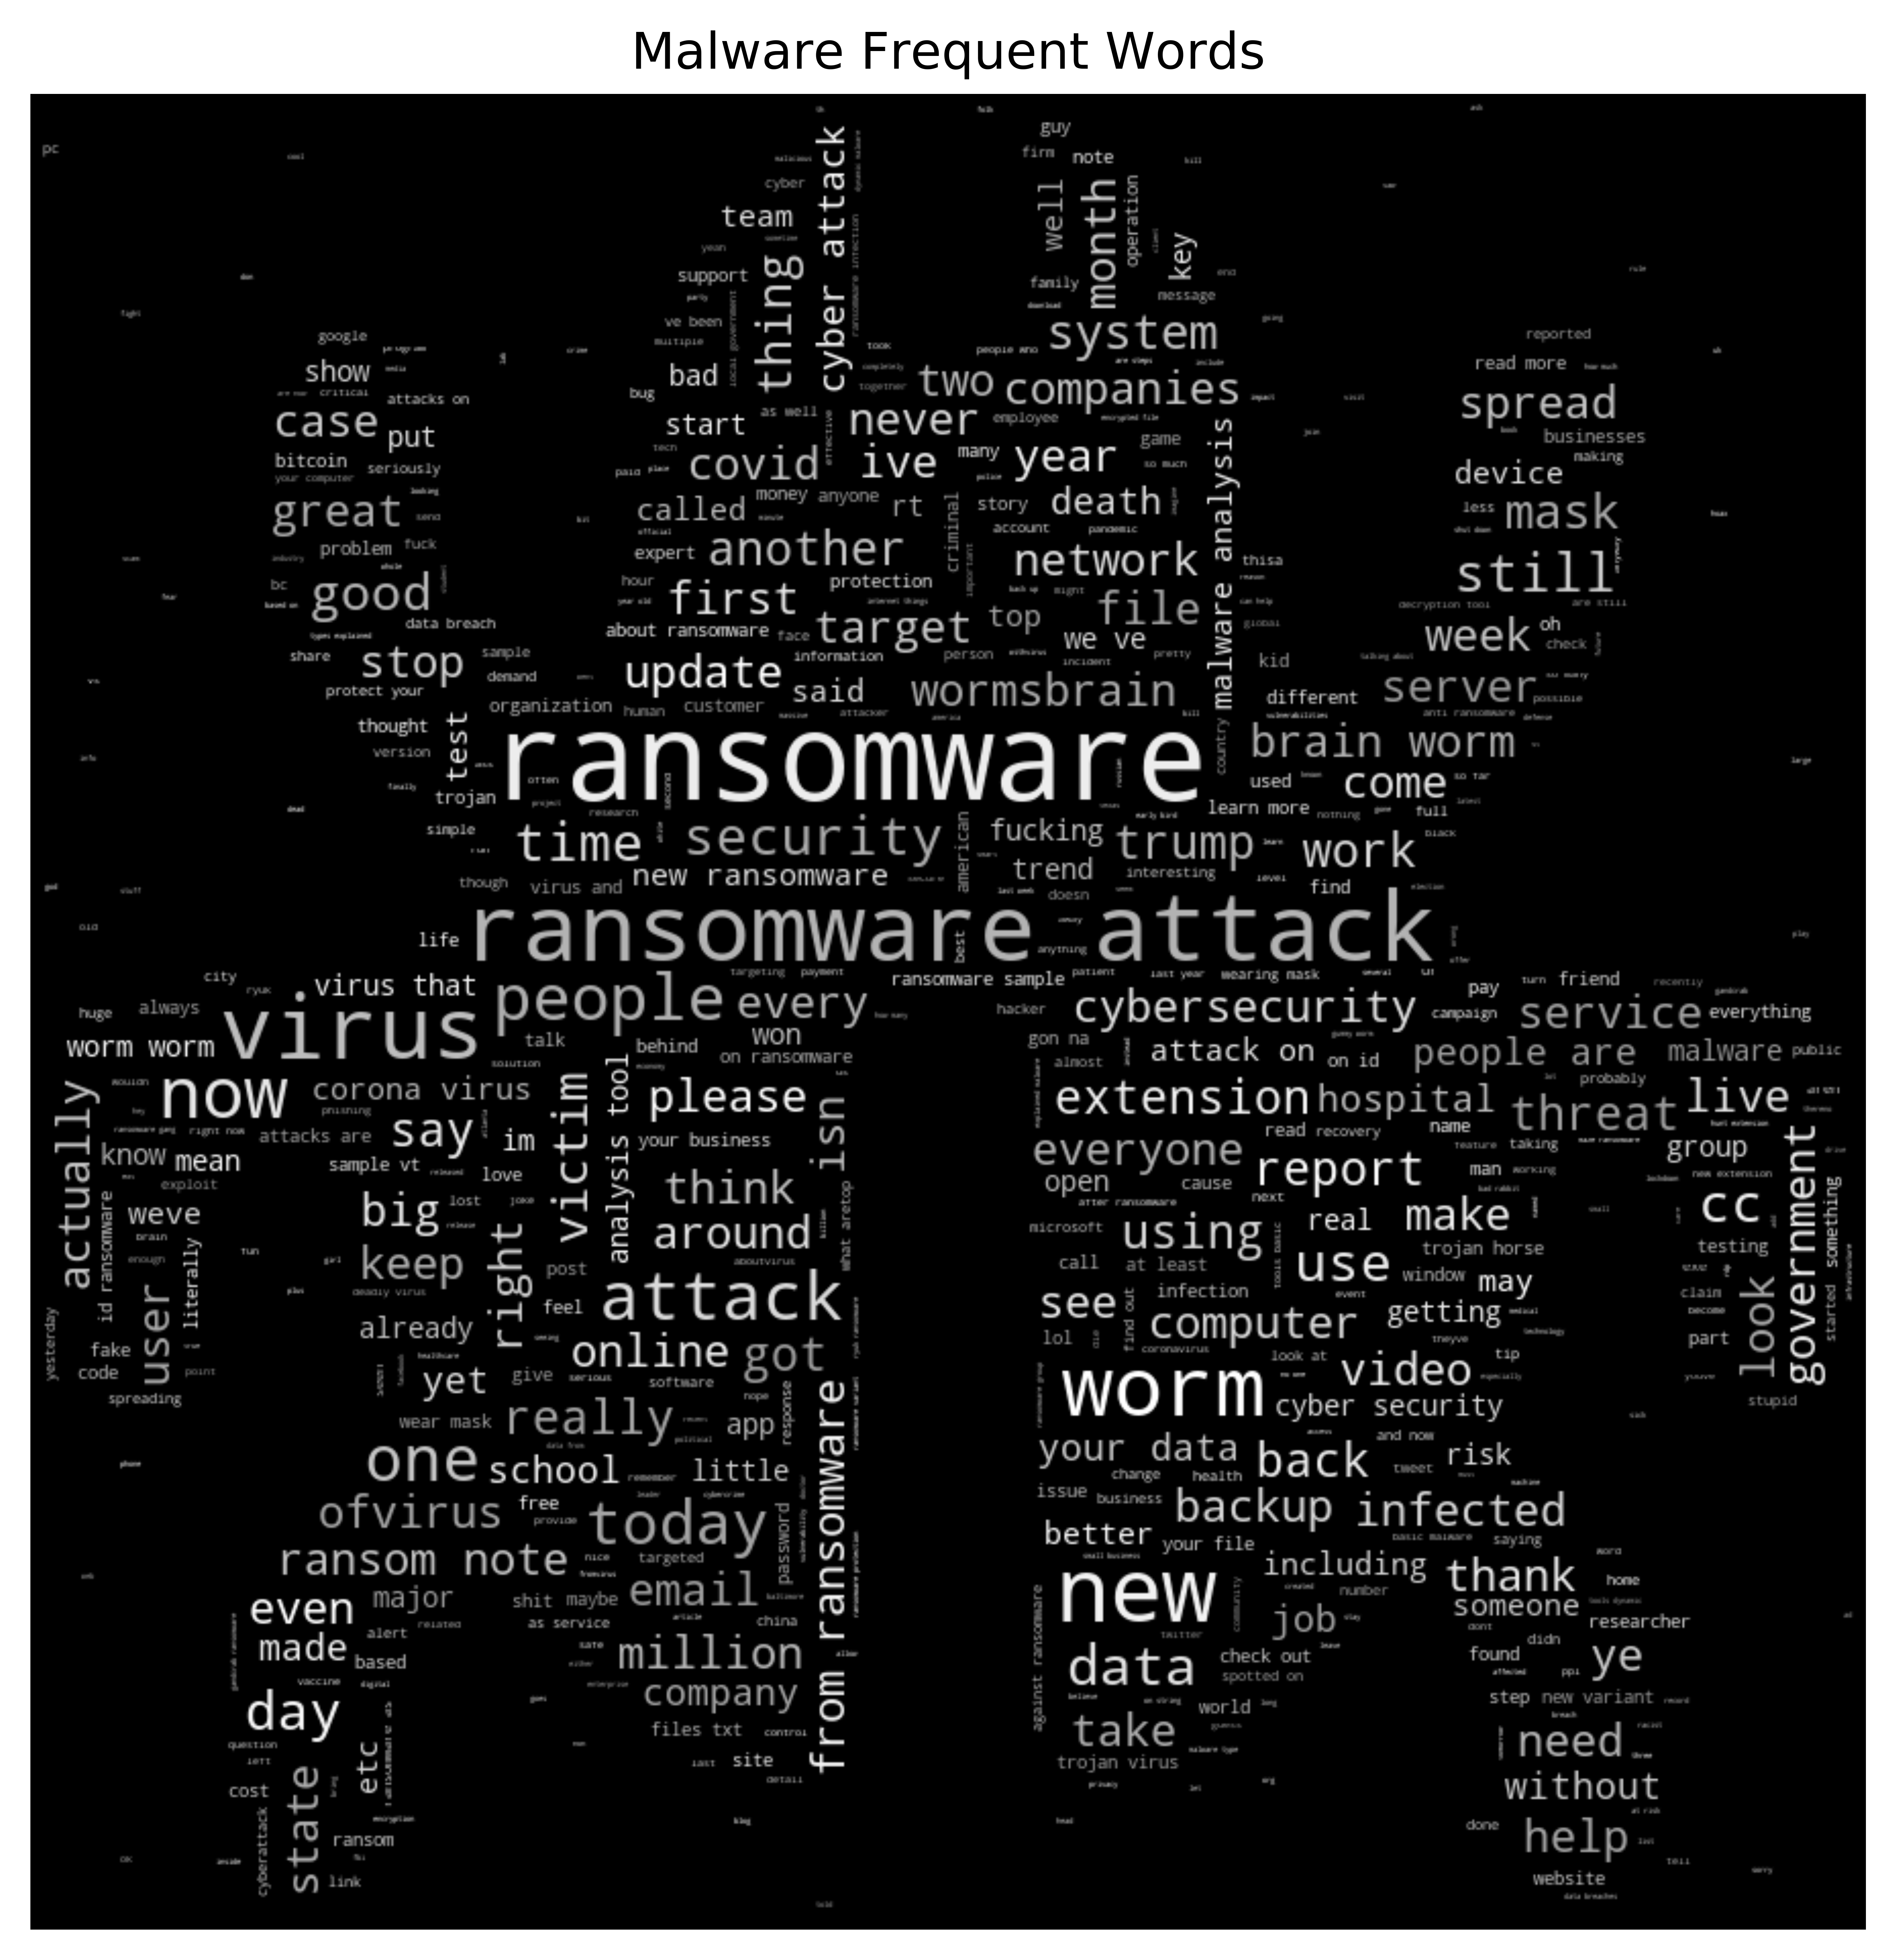

In [76]:
temp=' '.join(df_final1['tweet'].tolist())
wordcloud = WordCloud(background_color="black",max_words=2000, margin=10, mask=mask)#,width = 1024,height = 720)
wordcloud.generate(temp)
plt.figure(dpi=1000, figsize=(8, 8))
default_colors = wordcloud.to_array()
plt.title('Malware Frequent Words')
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.show()